<a href="https://colab.research.google.com/github/bcaffo/ds4bme_intro/blob/master/notebooks/LinearModels_and_FFTs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression and FFTs

Recall regression through the origin. If $y$ and $x$ are $n$-vectors of the same length, the minimizer of
$$
||y - \beta x ||^2
$$
is $\hat \beta = <x, y> / ||x||^2$. Note, if $||x|| = 1$ then the estimate is just $\hat \beta = <x, y>$. Now consider a second variable, $w$, such that $<x, w> = 0$ and $||w|| = 1$. Consider now the least squares model
$$
||y - \beta x - \gamma w||^2.
$$
We argued that the best estimate for $\beta$ now first gets rid of $w$ be regressing it out of $y$ and $x$. So, consider that
$$
||y - <w, y> w - \beta (x - <w, x> w)||^2 =
||y - <w, y> w - \beta x||^2. 
$$
Thus, now the best estimate of $\beta$ is
$$
<y - <w, y> w, x> = <y, x>.
$$
Or, in other words, if $x$ and $w$ are orthogonal then the coefficient estimate for $x$ with $w$ included is the same as the coefficient of $x$ by itself. This extends to more than two regressors. 

If you have a collection of $n$ mutually orthogonal vectors of norm one, they are called an orthonormal basis. For an orthonomal basis, 1. the coefficients are just the inner products between the regressors and the outcome and 2. inclusion or exclusion of other elemenents of the basis doesn't change a basis elements estimated coefficients.

It's important to note, that this works quite generally. For example, for complex numbers as well as real. So, for example, consider the possibility that $x$ is $e^{-2\pi i m k / n}$ for $m=0,\ldots, n-1$ for a particular value of $k$. Vectors like this are orthogonal for different values of $k$ and all have norm 1. We have already seen that the Fourier coefficient is 
$$
f_k = <y, x> = \sum_{m=0}^{n-1} y_m e^{-2\pi i m k / n} = 
\sum_{m=0}^{n-1} y_m \cos(-2\pi m k / n) + i \sum_{m=0}^{n-1} y_m \sin(-2\pi m k / n) 
$$
where $y_m$ is element $m$ of $y$. Thus, the Fourier coefficients are exactly just least squares coefficients applied in the complex space.  Thus we have that 
$$
f_k = a_k + i b_k
$$
where $a_k$ and $b_k$ are the coefficients from linear models with just the sine and cosine terms.


In [158]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm



In [159]:
dat = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dat.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145,39170,39186,39192,39227
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535,12666,12787,12921,13045,13153,13259
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023,50214,50400,50579,50754,50914,51067
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681,1681,1753,1753,1836,1836,1836
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117,4236,4363,4475,4590,4672,4718


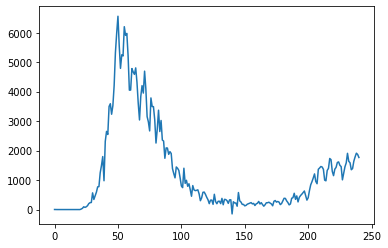

In [160]:
## Get Italy, drop everyrthing except dates, convert to long (unstack converts to tuple)
## Like an idiot, I'm using x in a different sense here than in the text, which I figured out well after I had done everything
x=dat[dat['Country/Region'] == 'Italy'].drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1).unstack()
## convert from tuple to array
x = np.asarray(x)  
## get case counts instead of cumulative counts
x = x[1 : x.size] - x[0 : (x.size - 1)]
## get the first non zero entry
x =  x[np.min(np.where(x !=  0)) : x.size]
plt.plot(x)



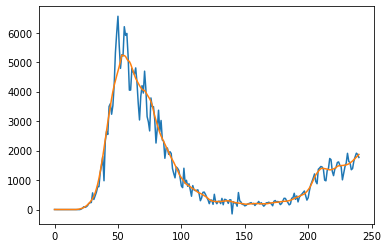

In [161]:
n = x.size
t = np.arange(0, n, 1)
lowess = sm.nonparametric.lowess
xhat = lowess(x, t, frac=.05,return_sorted=False)
plt.plot(x)
plt.plot(xhat)


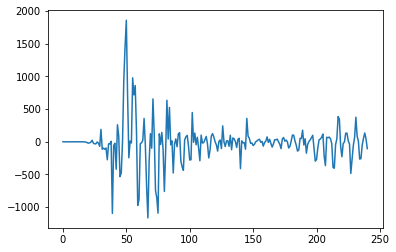

In [162]:
## We're interested in the residual
y = x - xhat
plt.plot(y)

In [163]:

## Create 4 elements
## Orthonormal basis (note dividing by sqrt(n/2) makes them norm 1)
c5  = np.cos(-2 * np.pi * t * 5 / n  ) / np.sqrt(n /2)
c20 = np.cos(-2 * np.pi * t * 20 / n ) / np.sqrt(n /2)
s5  = np.sin(-2 * np.pi * t * 5  / n  )/ np.sqrt(n /2)
s20 = np.sin(-2 * np.pi * t * 20 / n  ) / np.sqrt(n /2)

In [164]:
## Verify that they are orthonormal mean 0
[
 np.sum(c5),
 np.sum(c20),
 np.sum(s5),
 np.sum(s20),
 np.sum(c5 * c5),
 np.sum(c20 * c20),
 np.sum(s5 * s5),
 np.sum(s20 * s20),
 np.sum(c5 * s5),
 np.sum(c5 * s20),
 np.sum(c5 * c20),
 np.sum(s5 * s20),
]

[-9.992007221626409e-16,
 -6.800116025829084e-16,
 -2.220446049250313e-16,
 8.278100427361323e-15,
 0.9999999999999998,
 1.0000000000000002,
 1.0,
 0.9999999999999997,
 -3.447762908503904e-17,
 6.938893903907228e-17,
 3.5041414214731503e-16,
 -5.574967570920464e-16]

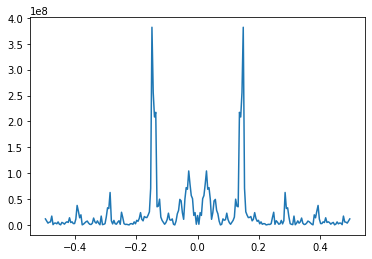

In [165]:
f = np.fft.fft(y)
w = np.fft.fftfreq(n)
ind = w.argsort()
f = f[ind] 
w = w[ind]
plt.plot(w, f.real**2 + f.imag**2)

In [166]:
[
 np.sum(c5 * y) * np.sqrt(n / 2),
 np.sum(c20 * y) * np.sqrt(n / 2),
 np.sum(s5 * y) * np.sqrt(n / 2),
 np.sum(s20 * y) * np.sqrt(n / 2),
] 

[7023.0638714666065,
 3129.666929693342,
 -2734.541573653142,
 -1381.5328656452866]

In [167]:
sreg = linear_model.LinearRegression()
x=np.c_[c5, c20, s5, s20]
fit = sreg.fit(x, y)
fit.coef_ * np.sqrt(n/2)


array([ 7023.06387147,  3129.66692969, -2734.54157365, -1381.53286565])

In [168]:
x=np.c_[c5, s5]
fit = sreg.fit(x, y)
fit.coef_ * np.sqrt(n/2)


array([ 7023.06387147, -2734.54157365])

In [169]:
test = np.where( np.abs(f.real / np.sum(c5 * y) / np.sqrt(n / 2) - 1) < 1e-5) 
[test, f.real[test], w[test], 5 / n]

[(array([115, 125]),),
 array([7023.06387147, 7023.06387147]),
 array([-0.02074689,  0.02074689]),
 0.02074688796680498]

In [170]:
f.imag[test]

array([ 2734.54157365, -2734.54157365])